# <u>Training Exercices - Model Specification: Motivation<u>

__<u>Jorge Pineño Pérez<u>__ / Module 4 - Model Specification

In [5]:
# package imports
install.packages("readxl")
install.packages("dplyr")
library(readxl)
library(dplyr)

Warning message:
"package 'readxl' is in use and will not be installed"
Installing package into 'C:/Users/USER/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpaMsyxG\downloaded_packages



Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




__<u>Training Exercise 3.1<u>__

In [4]:
# import the stock index dataframe
stocks <- read_excel('TrainExer3-1.xlsx')
head(stocks)

Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1927,17.66,0.77,0.0317,0.28082317,0.3746886,0.073954730,-3.132667,-2.766942,-0.021175602
1928,24.35,0.85,0.0426,0.31382421,0.2596667,0.042639369,-3.355051,-2.870448,-0.009793164
1929,21.45,0.97,0.0303,-0.11242845,0.3384578,0.165576428,-3.096184,-2.589490,0.001829714
1930,15.34,0.98,0.0148,-0.28802484,0.5547454,0.131524740,-2.750667,-2.760923,-0.060665091
1931,8.12,0.82,0.0241,-0.56374238,1.1707317,-0.011031583,-2.292781,-2.588626,-0.095711494
1932,6.89,0.50,0.0004,-0.09460234,1.4420843,-0.003958787,-2.623218,-2.821669,-0.103577705


__(a)__

In [6]:
# create a new column in the dataframe for the change in the log of "Index"
stocks1 <- stocks %>% mutate(ChangeLogIndex=c(NA, diff(log(Index))))
head(stocks1)

Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,ChangeLogIndex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1927,17.66,0.77,0.0317,0.28082317,0.3746886,0.073954730,-3.132667,-2.766942,-0.021175602,NA
1928,24.35,0.85,0.0426,0.31382421,0.2596667,0.042639369,-3.355051,-2.870448,-0.009793164,0.3212297
1929,21.45,0.97,0.0303,-0.11242845,0.3384578,0.165576428,-3.096184,-2.589490,0.001829714,-0.1268072
1930,15.34,0.98,0.0148,-0.28802484,0.5547454,0.131524740,-2.750667,-2.760923,-0.060665091,-0.3352608
1931,8.12,0.82,0.0241,-0.56374238,1.1707317,-0.011031583,-2.292781,-2.588626,-0.095711494,-0.6361336
1932,6.89,0.50,0.0004,-0.09460234,1.4420843,-0.003958787,-2.623218,-2.821669,-0.103577705,-0.1642591


In [7]:
# regress "ChangeLogIndex" on a constant and "BookMarket",
# and check that we get intercept=0.177, and coeff=-0.213
clog_index <- lm(ChangeLogIndex ~ BookMarket, data = stocks1)
summary(clog_index)


Call:
lm(formula = ChangeLogIndex ~ BookMarket, data = stocks1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58713 -0.09314  0.02152  0.13721  0.38236 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17695    0.04994   3.543 0.000648 ***
BookMarket  -0.21332    0.07896  -2.702 0.008347 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1912 on 84 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.07994,	Adjusted R-squared:  0.06899 
F-statistic: 7.299 on 1 and 84 DF,  p-value: 0.008347


__(b)__

In [8]:
# regress "Index" on a constant and "BookMarket",
# and check the p-value (Pr(>|t|)) of the coeff of "BookMarket"
bm_index <- lm(Index ~ BookMarket, data = stocks1)
summary(bm_index)


Call:
lm(formula = Index ~ BookMarket, data = stocks1)

Residuals:
   Min     1Q Median     3Q    Max 
-694.8 -252.2 -115.2  234.8 1183.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1035.35      95.02  10.896   <2e-16 ***
BookMarket  -1217.68     150.80  -8.075    4e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 366.5 on 85 degrees of freedom
Multiple R-squared:  0.4341,	Adjusted R-squared:  0.4274 
F-statistic:  65.2 on 1 and 85 DF,  p-value: 4.003e-12


__(c)__

In [20]:
# extract the residuals from both regressions
resid_clog <- residuals(clog_index)
resid_bm <- residuals(bm_index)

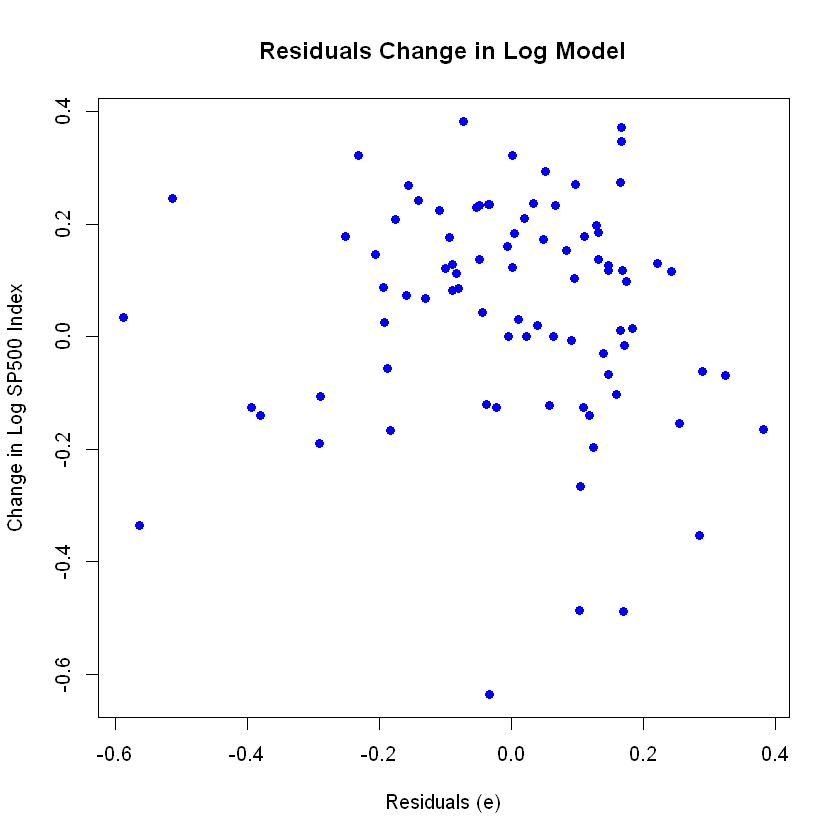

In [39]:
# make a scatter plot with the residuals from the change in log model
plot(resid_clog, stocks1[['ChangeLogIndex']][1:length(resid_clog)], # adjust the length because of the first NA value
     xlab = 'Residuals (e)', 
     ylab = 'Change in Log SP500 Index', 
     main = 'Residuals Change in Log Model',
     pch = 19, col = 'blue')

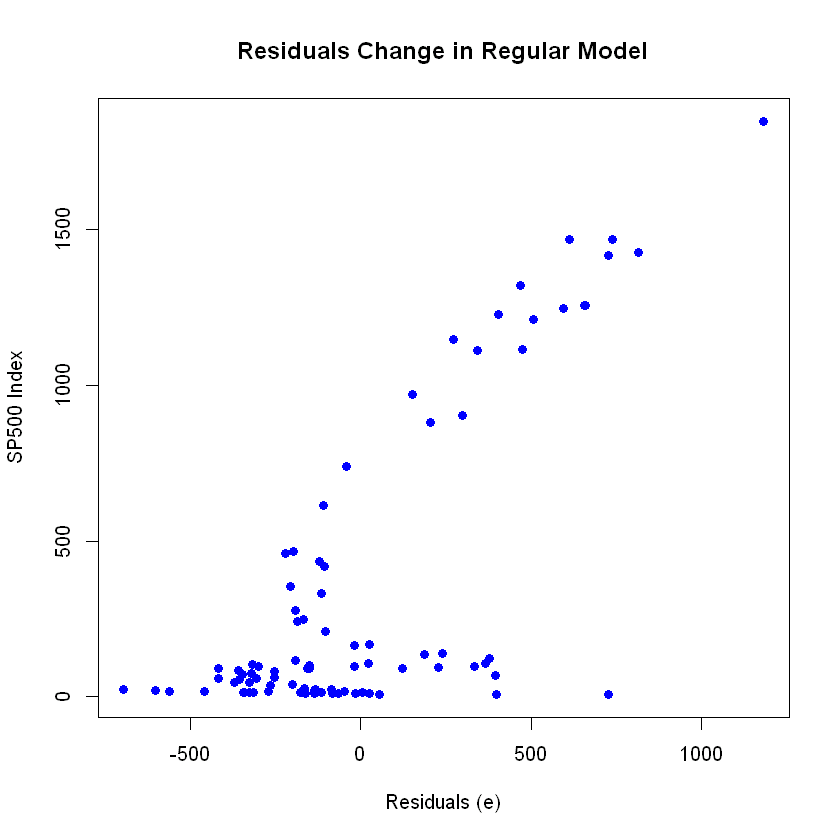

In [40]:
# make a scatter plot with the residuals from the regular model
plot(resid_bm, stocks1[['Index']],
     xlab = 'Residuals (e)', 
     ylab = 'SP500 Index', 
     main = 'Residuals Change in Regular Model',
     pch = 19, col = 'blue')